# Project :Disaster-Tweet

    The propose of this notebook is to create a NLP model which classifies the tweet into two part:
    * Disaster-tweet :
                All the tweet which contains information about the natural disaster happening around the globe will be                         classified as disaster tweet
    * Non-disaster tweet :
                Except disaster tweet all remaining other tweets is classified as non-disaster tweet

## Importing all needed module

In [3]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Setting up my own helper module

In [4]:
!wget https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py

--2023-02-23 16:37:03--  https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10449 (10K) [text/plain]
Saving to: 'helperfunc.py.1'

     0K ..........                                            100%  621K=0.02s

2023-02-23 16:37:03 (621 KB/s) - 'helperfunc.py.1' saved [10449/10449]



In [5]:
from helperfunc import calculate_results

## Get the data

In [6]:
data_dir ="C:\\Users\\USER\\Documents\\ML\\NLP\\disaster\\src\\disaster-tweet\\"
train_data_dir = data_dir + "train.csv"
test_data_dir = data_dir + "test.csv"

## Visualizing the data

In [7]:
train_data = pd.read_csv(train_data_dir )
test_data = pd.read_csv(test_data_dir)                         

train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
train_text = train_data["text"]
train_label = train_data["target"]
train_location = train_data["location"]
train_keyword = train_data["keyword"]

test_text = test_data["text"]
test_location = test_data["location"]
test_keyword = test_data["keyword"]

In [11]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
import random

random.choices(train_text, k =10)

["OMG NIXON LIVES! That is Richard M. Nixon Tricky Dicky right there in the picture isn't it. Hiding in Calgary he... http://t.co/MIUsvPxQTE",
 'Online infantryman experimental military training tutorials shower down upon assertative intelligence as regard...',
 'Horrible Accident Man Died In Wings of Airplane (29-07-2015) http://t.co/TfcdRONRA6',
 'WHY THE DEEP ROADS THO HAHAHAHA IM SO TRAUMATISED BY THE DEEP ROADS LOLOL',
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/gQskwqZuUl",
 'Satellite Spies Super Typhoon Soudelor from Space (Photo) http://t.co/VBhu2t8wgB',
 'Tell me why or why not\nto adopt in this way\nmaybe I overlooked something\nfatal for me\n?whyor why not?',
 'How many trains derailed that @wmata has to shut down orange/blue in most of DC? The Avengers made less of a mess @unsuckdcmetro',
 'I know where to go when the zombies take over!! http://t.co/hUTHXlkyxy',
 "'Trust us to get rescued by the dopey ones!' Val is hilarious shame

In [13]:
plt_list = []
leng = 0
for text in train_text:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(train_text)

101.03743596479706

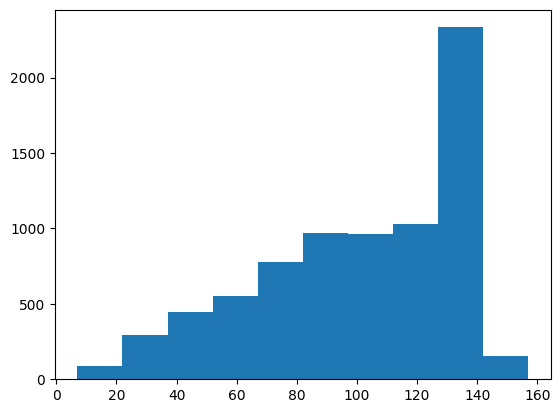

In [14]:
plt.hist(plt_list);

In [15]:
random.choices(train_location , k = 10)

[nan,
 nan,
 'Henderson, NV',
 'Broadview Heights, Ohio',
 'potters bar',
 nan,
 'Holland MI via Houston, CLE',
 'MÌ©xico',
 'Ikeja, Nigeria',
 'Long Eaton åá Derbyshire åá UK']

In [16]:
random.choices(train_keyword, k = 10)

['hailstorm',
 'hellfire',
 'blizzard',
 'detonate',
 'ambulance',
 'deaths',
 'crash',
 'blood',
 'derail',
 'upheaval']

In [17]:
max_vocab = 10000
output_length = 150

text_vector = layers.TextVectorization(max_tokens = max_vocab , output_sequence_length=output_length )

text_embed = layers.Embedding(max_vocab, 128, mask_zero=True)

text_vector.adapt(train_text)

In [18]:
train_sentences, val_sentences , train_target , val_target = train_test_split(
                                                                train_text,
                                                                train_label,
                                                                test_size = 0.3,
                                                                random_state = 42)

## Creating a dataset for the module

In [20]:
train_dataset_0 = tf.data.Dataset.from_tensor_slices((train_sentences, train_target))
val_dataset_0 = tf.data.Dataset.from_tensor_slices((val_sentences, val_target))

train_dataset_0 = train_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_0 = val_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)

In [21]:
train_dataset_0

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
train_dataset_0.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

## Creating our first model using simple CNN method

In [23]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vector(inputs)
x = text_embed(x)

x = layers.Conv1D(64, 2, activation = "tanh")(x)


x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64 , activation = "tanh")(x)
x = layers.Dense(64, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_0 = tf.keras.Model(inputs , outputs)

model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 150)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 150, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 149, 64)           16448     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160  

In [24]:
model_0.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_0.fit(train_dataset_0, 
           epochs = 10 ,
           validation_data=val_dataset_0)

Epoch 1/10
167/167 [==============================] - 9s 45ms/step - loss: 0.6839 - accuracy: 0.5746 - val_loss: 0.6581 - val_accuracy: 0.5775
Epoch 2/10
167/167 [==============================] - 7s 40ms/step - loss: 0.4900 - accuracy: 0.7634 - val_loss: 0.4994 - val_accuracy: 0.7890
Epoch 3/10
167/167 [==============================] - 7s 41ms/step - loss: 0.3478 - accuracy: 0.8480 - val_loss: 0.4926 - val_accuracy: 0.8135
Epoch 4/10
167/167 [==============================] - 7s 40ms/step - loss: 0.2859 - accuracy: 0.8808 - val_loss: 0.5532 - val_accuracy: 0.7977
Epoch 5/10
167/167 [==============================] - 7s 40ms/step - loss: 0.2617 - accuracy: 0.8979 - val_loss: 0.5702 - val_accuracy: 0.8039
Epoch 6/10
167/167 [==============================] - 7s 45ms/step - loss: 0.2140 - accuracy: 0.9146 - val_loss: 0.6160 - val_accuracy: 0.7968
Epoch 7/10
167/167 [==============================] - 8s 46ms/step - loss: 0.1977 - accuracy: 0.9176 - val_loss: 0.7124 - val_accuracy: 0.7518

In [25]:
train_target

1186    0
4071    1
5461    1
5787    1
7445    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5329, dtype: int64

## Visualizing the model's performance

In [30]:
model_0_preds = model_0.predict(val_dataset_0)
model_0_results = calculate_results(tf.round(model_0_preds), val_target)
model_0_results

72/72 [==============================] - 0s 7ms/step


{'accuracy': 71.2784588441331,
 'precision': 0.7407183485742784,
 'recall': 0.712784588441331,
 'f1': 0.7122526423772021}